### Mall Customer Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
mall_df = pd.read_csv("../dataset/Mall_Customers.csv")
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
mall_df.rename(columns={'Genre': 'Gender'}, inplace=True)
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
# access and drop row by condition
mall_df.drop(mall_df[mall_df["CustomerID"] == 1].index[0], axis=0, inplace=True)

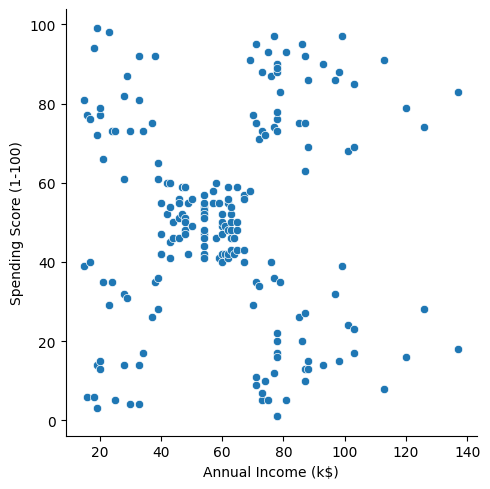

In [55]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=mall_df)

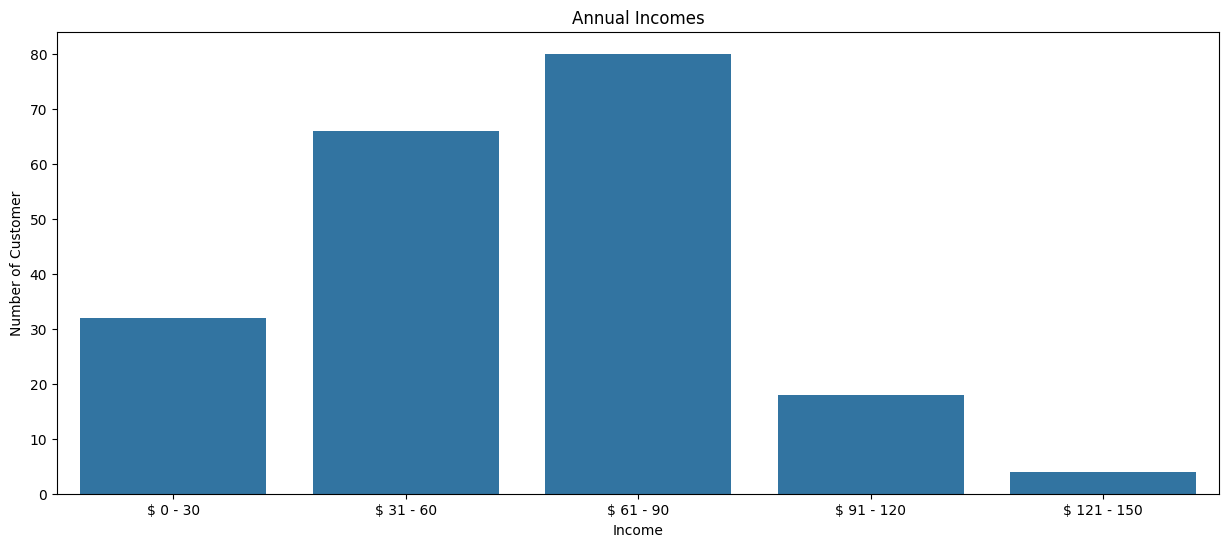

In [37]:
annual_income_1 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"] >= 0) & (mall_df["Annual Income (k$)"] <= 30)]
annual_income_2 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"] >= 31) & (mall_df["Annual Income (k$)"] <= 60)]
annual_income_3 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"] >= 61) & (mall_df["Annual Income (k$)"] <= 90)]
annual_income_4 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"] >= 91) & (mall_df["Annual Income (k$)"] <= 120)]
annual_income_5 = mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"] >= 121) & (mall_df["Annual Income (k$)"] <= 150)]

annual_income_x = ["$ 0 - 30", "$ 31 - 60", "$ 61 - 90", "$ 91 - 120", "$ 121 - 150"]
annual_income_y = [len(annual_income_1.values), len(annual_income_2.values), len(annual_income_3.values), len(annual_income_4.values), len(annual_income_5.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=annual_income_x, y=annual_income_y)
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


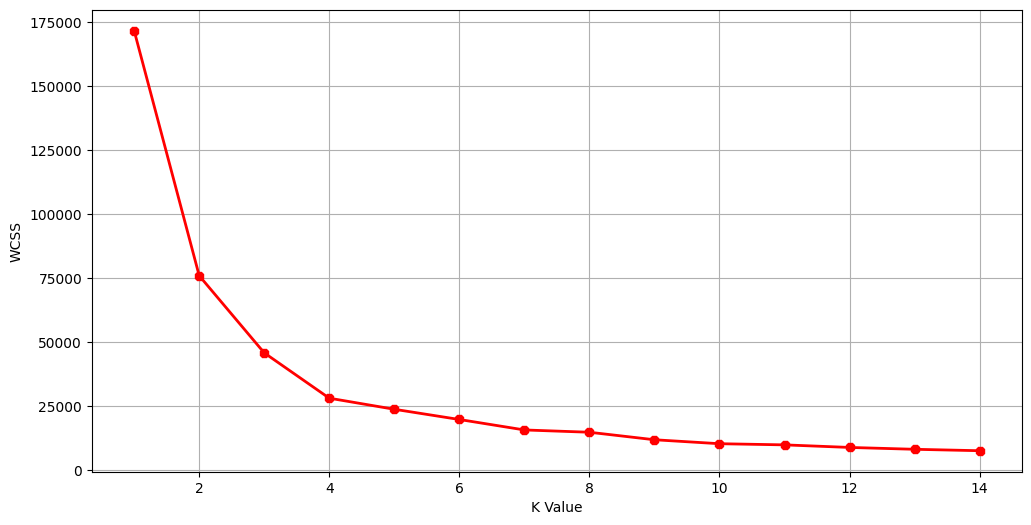

In [49]:
# FIND RECOMMEND K VALUE
X1 = mall_df.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [50]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [51]:
print(kmeans.cluster_centers_)

[[27.32608696 49.36956522]
 [30.1754386  82.35087719]
 [55.40816327 48.04081633]
 [43.29166667 15.02083333]]


In [74]:
type(kmeans.cluster_centers_)

numpy.ndarray

In [76]:
kmeans.cluster_centers_[:0]

array([], shape=(0, 2), dtype=float64)

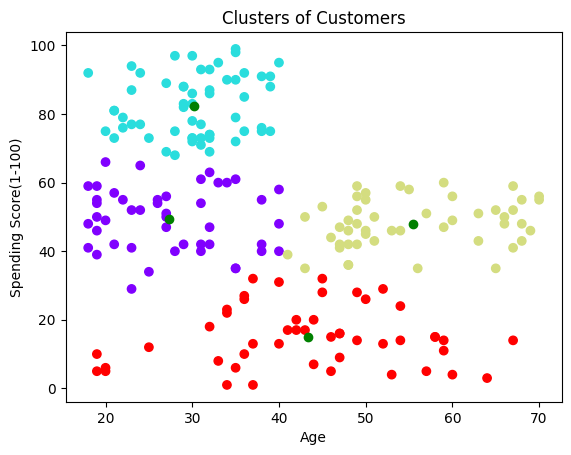

In [82]:
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='green')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

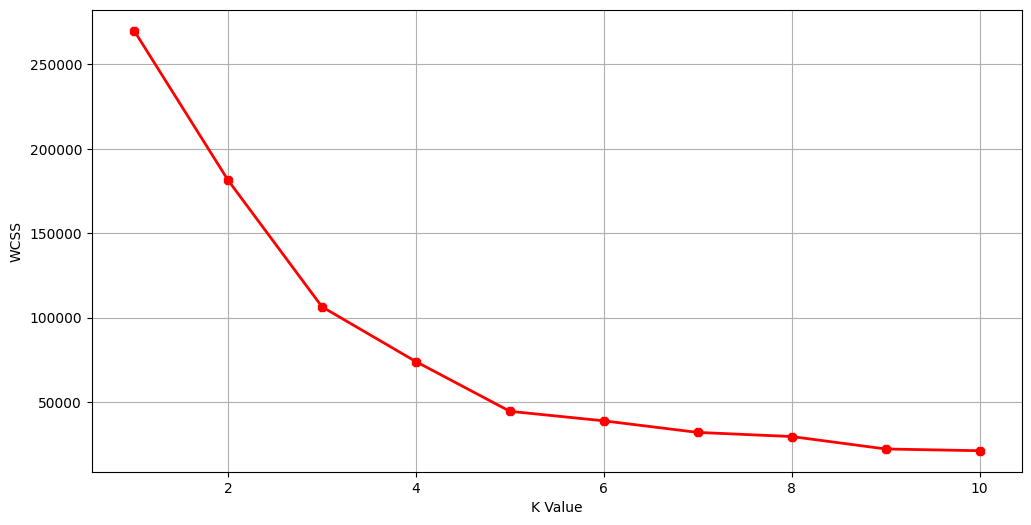

In [86]:
# FIND RECOMMEND K VALUE
X2 = mall_df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [87]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [ ]:

plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='green')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# Find K Optimize value
X3 = mall_df.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# calculate kmean for 3 variables
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

In [ ]:
# Plotting 3D View
clusters = kmeans.fit_predict(X3)
mall_df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
ax.scatter(mall_df.Age[mall_df.label == 0], 
           mall_df["Annual Income (k$)"][mall_df.label == 0], 
           mall_df['Spending Score (1-100)'][mall_df.label == 0], 
           color='blue', s=10, label='Cluster 0')
ax.scatter(mall_df.Age[mall_df.label == 1], 
           mall_df["Annual Income (k$)"][mall_df.label == 1], 
           mall_df['Spending Score (1-100)'][mall_df.label == 1], 
           color='red', s=10, label='Cluster 1')
ax.scatter(mall_df.Age[mall_df.label == 2], 
           mall_df["Annual Income (k$)"][mall_df.label == 2], 
           mall_df['Spending Score (1-100)'][mall_df.label == 2], 
           color='green', s=10, label='Cluster 2')
ax.scatter(mall_df.Age[mall_df.label == 3], 
           mall_df["Annual Income (k$)"][mall_df.label == 3], 
           mall_df['Spending Score (1-100)'][mall_df.label == 3], 
           color='purple', s=10, label='Cluster 3')
ax.scatter(mall_df.Age[mall_df.label == 4], 
           mall_df["Annual Income (k$)"][mall_df.label == 4], 
           mall_df['Spending Score (1-100)'][mall_df.label == 4], 
           color='orange', s=10, label='Cluster 4')

# Add labels to the axes
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Adjust the view angle
ax.view_init(30, 10)

# Add a legend
ax.legend()

plt.show()


In [ ]:
# calcualte len of each interval
len(mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"] >= 60) & (mall_df["Annual Income (k$)"] <= 80)])
len(mall_df["Annual Income (k$)"][(mall_df["Annual Income (k$)"] >= 20) & (mall_df["Annual Income (k$)"] <= 40)])

### Image Segmentation with K-Means Clustering

In [147]:
# import nessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# loading image and reshape for kmean clustering
image = mpl.image.imread("../dataset/apple2.jpg")
X = image.reshape(-1, 3)
plt.imshow(image)

In [ ]:
# fit image to KMean algorithms
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

In [ ]:
# visual image segmented
import cv2
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape).astype("uint8")
plt.imshow(segmented_img)
plt.axis('off') 
plt.show()

In [ ]:
# save image segmented with background
import cv2
cv2.imwrite("image1.png", segmented_img)

##### The problem is image detail has colors based on k clustering

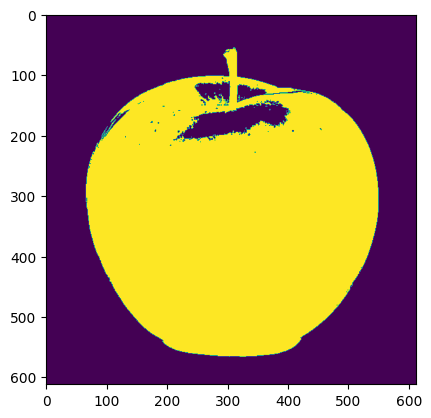

In [257]:
labels = kmeans.labels_.reshape(image.shape[:2])
labels.shape
mask = (labels == 1)
plt.imshow(mask)

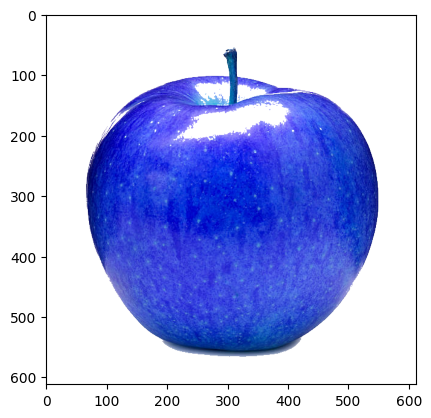

In [312]:
# save transparent image
labels = kmeans.labels_.reshape(image.shape[:2])

mask = (labels == 1)

transparent_img = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)

transparent_img[..., :3] = image

transparent_img[..., 3] = mask.astype(np.uint8) * 255

transparent_img = cv2.cvtColor(transparent_img, cv2.COLOR_BGR2RGBA)

cv2.imwrite(".first_cluster_transparent.png", transparent_img)

# Display the transparent image
plt.imshow(transparent_img)
plt.show()